<a href="https://colab.research.google.com/github/Alerakha/05_Aleron-Tsaqif-Rakha_PCVK_Ganjil_2024/blob/main/Pertemuan3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Masukkan nilai kecerahan : 20


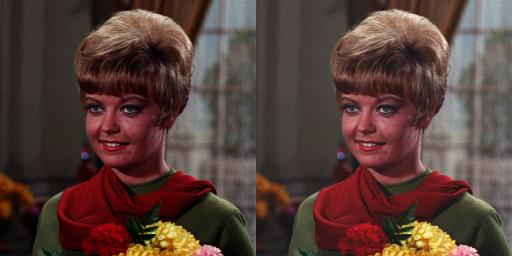

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

try:
  brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')
brightness_img = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_img[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat([original, brightness_img])
cv2_imshow(final_frame)


Tugas no.1


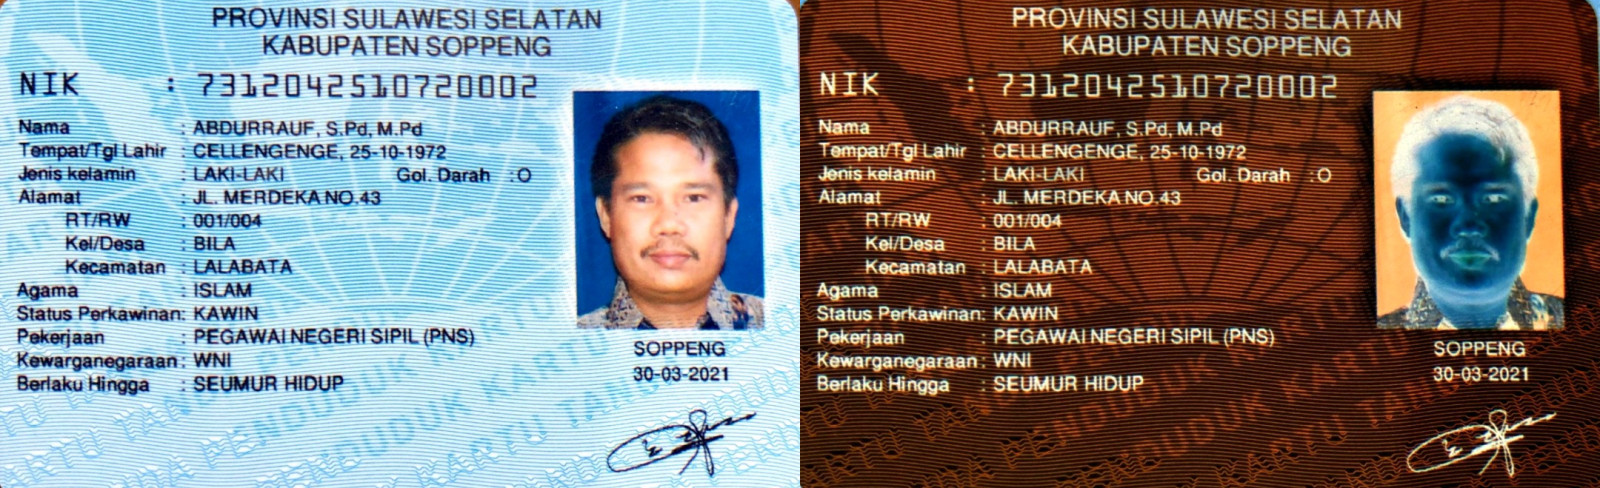

Tugas no.2


In [3]:
# @title TUGAS PRAKTIKUM
# Tugas 1
img = cv.imread('KTP.jpg')
img2 = 255 - img
final_frame = cv.hconcat([img, img2])
print("Tugas no.1")
cv2_imshow(final_frame)
print("Tugas no.2")
img = cv.imread('KTP.jpg')



Masukkan Nilai Kontras : 2
Masukkan Nilai Brightness : 20


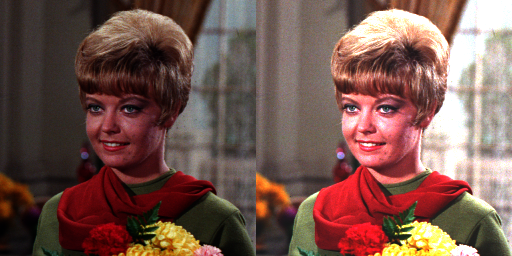

In [33]:
# @title Tugas 2
# Contrast control (a)
img_female = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
try:
  a = int(input('Masukkan Nilai Kontras : '))
except ValueError:
  print('Error, not a number')


# Brightness control (b)
b = int(input('Masukkan Nilai Brightness : '))

# Create an empty image with the same dimensions and type as the original

img_tugas = np.zeros(img_female.shape, img_female.dtype)

# Apply the formula to each pixel
for y in range(img_female.shape[0]):
  for x in range(img_female.shape[1]):
    for c in range(img_female.shape[2]):
      img_tugas[y,x,c] = np.clip(a * img_female[y,x,c] + b, 0, 255)

# cv2_imshow(img_tugas)
final_frame = cv.hconcat([img_female,img_tugas])
cv2_imshow(final_frame)

Masukkan Nilai Kecerahan : 30


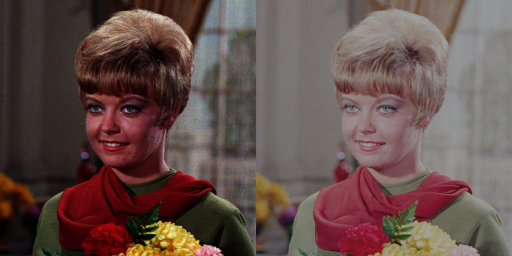

In [38]:
# @title TUGAS 3
img_female = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

# Brightness control (b)
b = int(input('Masukkan Nilai Kecerahan : '))

# Create an empty image with the same dimensions and type as the original

img_tugas = np.zeros(img_female.shape, img_female.dtype)

# Apply the formula to each pixel
for y in range(img_female.shape[0]):
  for x in range(img_female.shape[1]):
    for c in range(img_female.shape[2]):
      img_tugas[y,x,c] = b * np.log(1 + img_female[y,x,c])

# cv2_imshow(img_tugas)
final_frame = cv.hconcat([img_female,img_tugas])
cv2_imshow(final_frame)

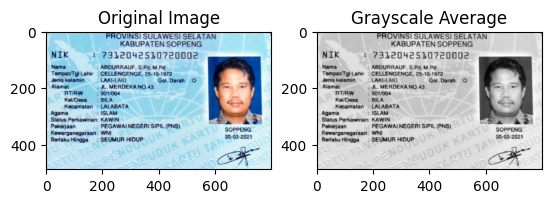

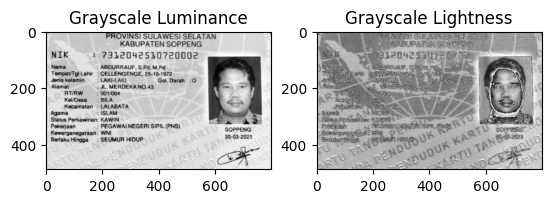

In [30]:
# @title TUGAS 4
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

def grayscale_avg(image):
    return np.mean(image, axis=2).astype(np.uint8)

def grayscale_lightness(image):
    max_val = np.max(image, axis=2)
    min_val = np.min(image, axis=2)
    return ((max_val + min_val) / 2).astype(np.uint8)

def grayscale_luminance(image):
    return (0.21 * image[:,:,0] + 0.72 * image[:,:,1] + 0.07 * image[:,:,2]).astype(np.uint8)

# Baca gambar berwarna
img = cv.imread('KTP.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Averaging
gray_avg = grayscale_avg(img)

# Lightness
gray_light = grayscale_lightness(img)

# Luminance
gray_luminance = grayscale_luminance(img)

plt.subplot(1,2,1), plt.imshow(img), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(gray_avg, cmap='gray'), plt.title('Grayscale Average')
plt.show()

plt.subplot(1,2,1), plt.imshow(gray_luminance, cmap='gray'), plt.title('Grayscale Luminance')
plt.subplot(1,2,2), plt.imshow(gray_light, cmap='gray'), plt.title('Grayscale Lightness')
plt.show()


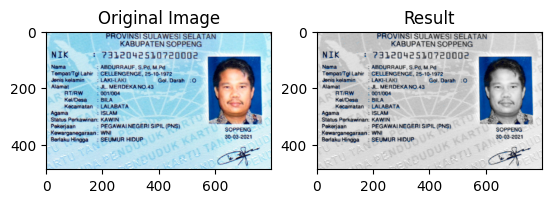

In [35]:
# @title TUGAS 5
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Baca citra
img = cv.imread('KTP.jpg')

# Konversi citra dari RGB ke HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Definisikan rentang warna biru dalam HSV
lower_blue = np.array([100, 150, 0], np.uint8)
upper_blue = np.array([140, 255, 255], np.uint8)

# Membuat mask untuk mendeteksi warna biru
mask_blue = cv.inRange(hsv, lower_blue, upper_blue)

# Membuat citra grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Mengonversi grayscale menjadi citra 3-channel untuk pencampuran dengan warna asli
gray_img_3ch = cv.cvtColor(gray_img, cv.COLOR_GRAY2BGR)

# Gabungkan bagian biru dengan citra grayscale
# Bagian biru tetap berwarna, bagian lainnya grayscale
result = np.where(mask_blue[:, :, None] == 255, img, gray_img_3ch)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
result = cv.cvtColor(result, cv.COLOR_BGR2RGB)

# Tampilkan citra hasil
plt.subplot(1,2,1), plt.imshow(img), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(result), plt.title('Result')
plt.show()
